In [1]:
### Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Read CSV file & Future Formatting
df_data = pd.read_csv("data.csv")
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:.2f}".format

In [ ]:
### Sampling
subtype_counts = df_data["Traffic Subtype"].value_counts()
subtypes_smapling = subtype_counts[subtype_counts > 10000].index
df_sampling = df_data.filter(subtypes_smapling.tolist())
df_sampled = df_sampling.sample(frac=0.01)

In [3]:
### Data introduction
# Identify unnecessary and target columns
DROP_LABELS = ["Flow ID", "Src IP", "Src Port", "Dst IP", "Dst Port", "Timestamp"]
TARGET_LABELS = ["Label", "Traffic Type", "Traffic Subtype"]

# Drop unnecessary columns and present data
def present(df: pd.DataFrame) -> pd.DataFrame:
    print("Dataset before removing unecessary data and duplicates has", df.shape[0], "rows and", df.shape[1], "columns")
    print("Removing unnecessary data and duplicates ...")    
    df = df.drop(columns=DROP_LABELS)
    df = df.drop_duplicates()
    print("Dataset after removing unecessary data and duplicates has", df.shape[0], "rows and", df.shape[1], "columns")

    display(df.head())
    display(df.tail())
    display(df.describe())
    display(df.groupby(TARGET_LABELS).size().reset_index(name="Counts"))

    return df

In [4]:
### Correlation, target correlation and intresting columns
def correlation(df: pd.DataFrame, target=False):
    if target == True:
        plot_labels = []
        new_df = pd.get_dummies(df, columns=["Label"], dtype=int)
        cor = new_df.corr(numeric_only=True).filter(["Label_Malicious"])
        cor.rename(columns={"Label_Malicious": "Malicious"}, inplace=True)
        cor.rename(index={"Label_Malicious": "Malicious", "Label_Benign": "Benign"}, inplace=True)

        for r in cor.index.tolist():
            if abs(cor.at[r, "Malicious"]) > 0.1 and r != "Benign" and r != "Malicious":
                plot_labels.append(r)

        print(len(r), "Metrics with high correlration with target")
        return cor, plot_labels

    else:
        new_df = pd.get_dummies(df, columns=["Label"], dtype=int)
        new_df.rename(columns={"Label_Malicious": "Malicious", "Label_Benign": "Benign"}, inplace=True)
        return new_df.corr(numeric_only=True)

In [ ]:
### Data Visualization
# Create heatmap from correlation Pandas Dataframe
def heatmap(corr: pd.DataFrame, title: str) -> None:
    print("Generating heatmap ...")
    plt.figure(figsize=(30, 20))
    sns.heatmap(corr, cmap="coolwarm", square=True)
    plt.title(title)
    plt.show()

# Create boxplot diagram to showcase target differences
def boxplot(df: pd.DataFrame, title: str) -> None:
    print("Generating boxplot ...")
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=df)
    plt.xticks(rotation = 65, ha = "right", fontsize=8)
    plt.title(title)
    plt.show()

# Create countplot to showcase certain values
def countplot(df: pd.DataFrame, title: str) -> None:
    print("Generating countplot ...")
    plt.figure(figsize=(15, 10))
    sns.countplot(data=df)
    plt.title(title)
    plt.show()

In [ ]:
### Remove excess metrics and duplicates, present data 
df = present(df_data)
del df_data

Dataset before removing unecessary data and duplicates has 8656767 rows and 86 columns
Removing unnecessary data and duplicates ...
Dataset after removing unecessary data and duplicates has 7252155 rows and 80 columns


,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,6.00,52601173.00,1701.00,1793.00,149935.00,140566.00,1318.00,0.00,88.15,99.78,1348.00,0.00,78.40,87.19,5522.71,66.42,15059.02,97621.75,3252689.00,-73.00,52600247.00,30941.32,139416.19,3257759.00,21.00,52600977.00,29353.22,136478.31,3256370.00,123.00,0.00,0.00,0.00,0.00,54464.00,57384.00,32.34,34.09,0.00,1348.00,83.12,93.64,8769.19,2.00,2.00,0.00,2416.00,3493.00,0.00,0.00,0.00,1.00,83.14,88.15,78.40,0.00,0.00,0.00,72603.00,603.00,7187.00,340.00,29987.00,358.00,28113.00,65280.00,2068.00,1206.00,32.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Audio,Audio
1,6.00,119106942.00,36.00,57.00,1280.00,1650.00,41.00,0.00,35.56,13.01,66.00,0.00,28.95,33.04,24.60,0.78,1294640.67,2083522.90,5003516.00,96.00,119066998.00,3401914.23,2105501.72,5008354.00,235.00,119095444.00,2126704.36,2320660.14,5003516.00,2134.00,1.00,0.00,0.00,0.00,1164.00,1836.00,0.30,0.48,0.00,66.00,31.61,27.06,732.41,0.00,0.00,0.00,57.00,93.00,0.00,0.00,0.00,1.00,31.95,35.56,28.95,0.00,0.00,0.00,182.00,4.00,157.00,1.00,49.00,2.00,63.00,502.00,502.00,31.00,32.00,18023274.67,3416174.00,19996926.00,14078617.00,5001511.00,1737.40,5003516.00,5000449.00,Benign,Audio,Audio
2,6.00,5589.00,1.00,1.00,124.00,0.00,124.00,124.00,124.00,0.00,0.00,0.00,0.00,0.00,22186.44,357.85,5589.00,0.00,5589.00,5589.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,32.00,32.00,178.92,178.92,0.00,124.00,82.67,71.59,5125.33,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,1.00,124.00,124.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,501.00,502.00,0.00,32.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Audio,Audio
3,6.00,118166562.00,3932.00,4196.00,403875.00,301478.00,1348.00,0.00,102.71,164.10,1348.00,0.00,71.85,94.53,5969.14,68.78,14540.00,84243.33,3663220.00,-497.00,118166562.00,30060.18,123372.19,3663290.00,0.00,118141369.00,28162.42,116725.17,3663475.00,55.00,0.00,0.00,0.00,0.00,125928.00,134508.00,33.28,35.51,0.00,1348.00,86.77,133.69,17873.89,0.00,2.00,0.00,5329.00,8127.00,0.00,0.00,0.00,1.00,86.78,102.71,71.85,0.00,0.00,0.00,100716.00,764.00,7317.00,393.00,40387.00,419.00,30147.00,65280.00,4708.00,2770.00,32.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Audio,Audio
4,17.00,119988385.00,25.00,6795.00,225.00,534811.00,9.00,9.00,9.00,0.00,121.00,9.00,78.71,16.72,4459.06,56.84,17596.18,105625.36,4685144.00,98.00,119988195.00,4999508.12,3117.11,5007045.00,4992305.00,119987788.00,17660.85,105817.84,4685411.00,98.00,0.00,0.00,0.00,0.00,200.00,54360.00,0.21,56.63,9.00,121.00,78.44,17.23,296.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,271.00,78.45,9.00,78.71,0.00,0.00,0.00,76426.00,973.00,5507.00,2.00,25.00,755.00,59423.00,0.00,0.00,24.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Audio,Audi

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
8656762,17.00,22485411.00,2307.00,0.00,3036012.00,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,135021.41,102.60,9750.83,2943.43,34364.00,30.00,22485411.00,9750.83,2943.43,34364.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18456.00,0.00,102.60,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1316.57,1316.00,0.00,0.00,0.00,0.00,3036012.00,2307.00,135021.00,0.00,0.00,0.00,0.00,0.00,0.00,2306.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Video,Video UDP
8656763,0.00,65027682.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,8128460.25,13829860.15,38099180.00,403.00,65027682.00,8128460.25,13829860.15,38099180.00,403.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3586913.00,0.00,3586913.00,3586913.00,28925934.50,12972928.20,38099180.00,19752689.00,Benign,Video,Video UDP
8656764,17.00,49795393.00,5256.00,0.00,6916896.00,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,138906.34,105.55,9475.81,46833.33,482563.00,0.00,49795393.00,9475.81,46833.33,482563.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42048.00,0.00,105.55,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1316.25,1316.00,0.00,0.00,0.00,0.00,6916896.00,5256.00,138906.00,0.00,0.00,0.00,0.00,0.00,0.00,5255.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Video,Video UDP
8656765,17.00,8809176.00,596.00,0.00,784336.00,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,89036.25,67.66,14805.34,62796.18,773425.00,0.00,8809176.00,14805.34,62796.18,773425.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4768.00,0.00,67.66,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1318.21,1316.00,0.00,0.00,0.00,0.00,784336.00,596.00,89036.00,0.00,0.00,0.00,0.00,0.00,0.00,595.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Video,Video UDP
8656766,17.00,2856556.00,477.00,0.00,627732.00,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,219751.34,166.98,6001.17,3897.52,25978.00,17.00,2856556.00,6001.17,3897.52,25978.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3816.00,0.00,166.98,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1318.76,1316.00,0.00,0.00,0.00,0.00,627732.00,477.00,219751.00,0.00,0.00,0.00,0.00,0.00,0.00,476.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Video,Video UDP


,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00,7252155.00
mean,6.51,10517739.28,4.37,0.97,931.26,170.33,328.05,311.10,318.15,8.15,4.86,0.41,1.64,2.17,3201.66,30.55,5465432.49,2587596.29,7790211.86,3409296.60,10125970.53,6431966.40,1155302.86,7541397.07,5529558.60,74740.18,24256.50,29030.70,59779.03,6933.59,0.13,0.00,0.11,0.00,53.35,20.04,19.79,10.77,119.10,330.10,264.03,108.49,42246.98,0.19,0.27,0.97,0.44,1.20,0.22,0.20,0.20,0.35,368.99,318.15,1.64,0.00,0.00,0.00,357.17,0.30,9030.35,1.61,379.77,0.26,42.38,1184.20,28.69,1.22,21.07,346824.78,19478.93,363590.16,332125.96,6774000.16,669582.12,7339399.29,6276055.84
std,2.31,13730280.74,587.19,110.66,47525.86,30676.01,385.37,378.06,377.59,47.99,60.28,15.78,24.89,28.56,233189.97,2227.50,7262797.37,4810738.42,9598940.96,6905769.74,13527391.59,8235591.08,3211178.56,9438249.83,7991797.22,1302778.75,432847.90,476676.06,982278.33,326035.99,0.33,0.00,0.31,0.00,807.19,855.42,2219.91,105.88,291.58,386.65,325.16,174.58,113292.92,0.54,1.37,0.59,20.66,47.06,0.76,0.73,0.72,0.73,458.05,377.59,24.89,0.00,0.00,0.00,55363.18,42.32,6690193.67,148.62,4581.22,38.61,17323.34,6614.89,1209.20,37.23,6.09,1114400.28,238219.58,1195060.61,1074171.55,9065265.91,2579085.74,9880289.72,8693483.58
min,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,1.00,0.00,1.00,-945.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.00,99328.50,1.00,0.00,50.00,0.00,50.00,50.00,50.00,0.00,0.00,0.00,0.00,0.00,10.46,0.20,98588.00,0.00,99118.00,38529.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.18,0.00,0.00,50.00,33.33,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,50.00,0.00,0.00,0.00,0.00,0.00,0.0

,Label,Traffic Type,Traffic Subtype,Counts
0,Benign,Audio,Audio,190
1,Benign,Background,Background,32
2,Benign,Text,Text,209
3,Benign,Video,Video HTTP,364
4,Benign,Video,Video RTP,349
5,Benign,Video,Video UDP,145
6,Malicious,Bruteforce,Bruteforce DNS,21476
7,Malicious,Bruteforce,Bruteforce FTP,3485
8,Malicious,Bruteforce,Bruteforce HTTP,628
9,Malicious,Bruteforce,Bruteforce SSH,3927


Generating boxplot ...


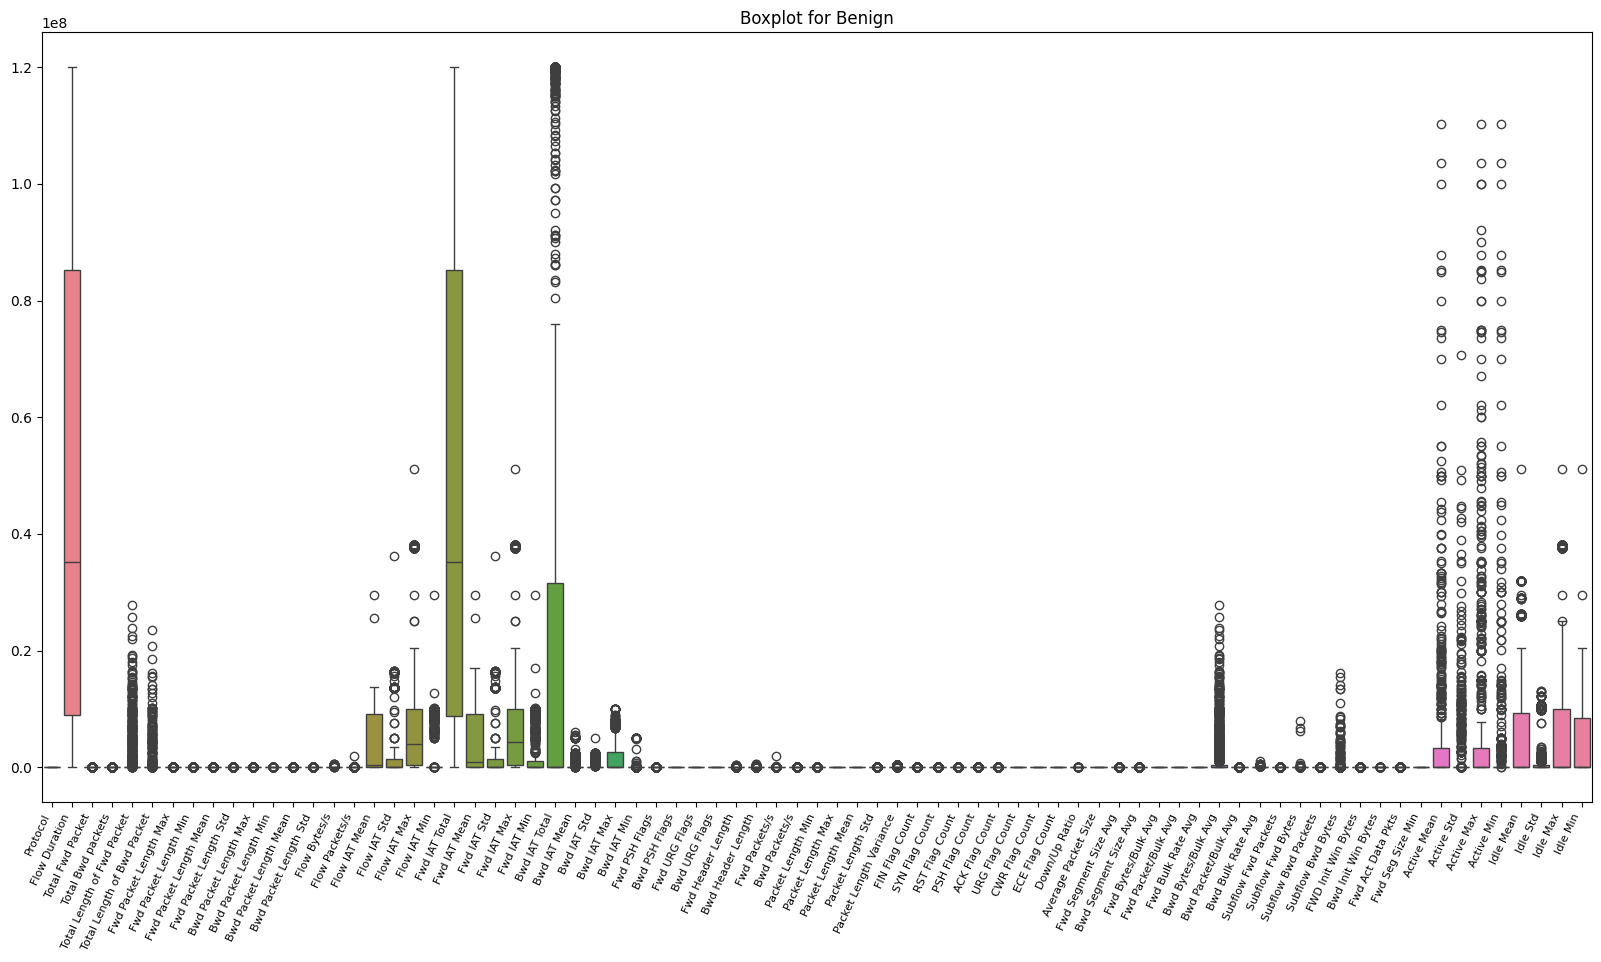

Generating boxplot ...


MemoryError: Unable to allocate 4.16 GiB for an array with shape (77, 7250866) and data type float64

<Figure size 2000x1000 with 0 Axes>

In [14]:
### Present distributions for all metrics for both Benign and Malicious labels
df_benign = df[df["Label"] == "Benign"]
df_malicious = df[df["Label"] == "Malicious"]

"""benign_list = ["Audio", "Background", "Text", "Video"]
malicious_list = ["Bruteforce", "DoS", "Information Gathering", "Mirai"]

for ttype in benign_list:
    boxplot(df_benign[df_benign["Traffic Type"] == ttype].drop(columns=TARGET_LABELS), "Boxplot for traffic type: " + ttype)

for ttype in malicious_list:
    boxplot(df_malicious[df_malicious["Traffic Type"] == ttype].drop(columns=TARGET_LABELS), "Boxplot for traffic type: " + ttype)"""

boxplot(df_benign.drop(columns=TARGET_LABELS), "Boxplot for Benign")
boxplot(df_malicious.drop(columns=TARGET_LABELS), "Boxplot for Malicious")

In [ ]:
# Compute correlations
cor1 = correlation(df)
cor2, important_labels = correlation(df, target=True)

In [ ]:
### Create heatmaps
heatmap(cor1, "Correlation between metrics")
heatmap(cor2, "Correlation between metrics and target")

In [ ]:
### Showcase top correlations
df_important_count = cor2.filter(important_labels)
countplot(df_important_count, "Top metrics in terms of correlation with target")